# Eight schools data - Stan

#### Josep Fortiana 2018-12-19

In [1]:
#install.packages("ggplot2", repos= "https://cloud.r-project.org")
#install.packages("StanHeaders", repos= "https://cloud.r-project.org")
#install.packages("rstan", repos= "https://cloud.r-project.org")
require(rstan)

Loading required package: rstan
Warning message:
"package 'rstan' was built under R version 3.4.3"Loading required package: ggplot2
Loading required package: StanHeaders
rstan (Version 2.17.2, GitRev: 2e1f913d3ca3)
For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)


In [2]:
options(mc.cores = parallel::detectCores())
rstan_options("auto_write" = TRUE)

### Data

In [3]:
J <- 8
y <- c(28,  8, -3,  7, -1,  1, 18, 12)
s <- c(15, 10, 16, 11,  9, 11, 10, 18)

In [7]:
tau <- 25
schools.data<-list(
    J = J,
    y = y,
    s = s,
    tau = tau
    )

### Specify model

Notice that, in addition to the `parameters` statement, there is a `transformed parameters` statement, with the obvious meaning.

In [8]:
schools.model<-"
    data{
        int<lower=0> J; // number of schools 
        real y[J]; // estimated treatment effects
        real<lower=0> s[J]; // s.e. of effect estimates 
        }
    parameters{
        real mu; 
        real<lower=0> tau;
        real eta[J];
        }
    transformed parameters{
        real theta[J];
        for (j in 1:J)
            theta[j] <- mu + tau * eta[j];
        }
    model{
        eta ~ normal(0, 1);
        y ~ normal(theta, s);
        }
    " # close quote for modelString

### Translate model to C++ and compile to _Dynamic Shared Object (DSO)_

In [9]:
schools.stanDso<-stan_model(model_code=schools.model)

### Generate posterior sample

In [11]:
schools.stanFit<-sampling(
        object=schools.stanDso, 
        data = schools.data, 
        chains = 4 ,
        iter = 2000 , 
        warmup = 500 , 
        thin = 1,
        control = list(adapt_delta = 0.99)
        )

In [12]:
schools.summary<-summary(schools.stanFit, probs=c(0.025,0.975))
round(schools.summary$summary,3)

,mean,se_mean,sd,2.5%,97.5%,n_eff,Rhat
mu,7.878,0.080,5.187,-2.204,18.163,4152.040,1.000
tau,6.522,0.116,5.651,0.202,20.063,2393.149,1.001
eta[1],0.380,0.013,0.946,-1.530,2.162,5562.999,1.000
eta[2],0.005,0.011,0.881,-1.716,1.741,6000.000,1.000
eta[3],-0.201,0.012,0.908,-1.981,1.576,6000.000,1.000
eta[4],-0.024,0.011,0.880,-1.753,1.765,6000.000,1.000
eta[5],-0.340,0.011,0.858,-2.026,1.399,6000.000,1.000
eta[6],-0.195,0.012,0.883,-1.915,1.613,5506.839,1.001
eta[7],0.331,0.012,0.903,-1.489,2.057,6000.000,1.001
eta[8],0.059,0.012,0.944,-1.773,1.914,6000.000,1.000


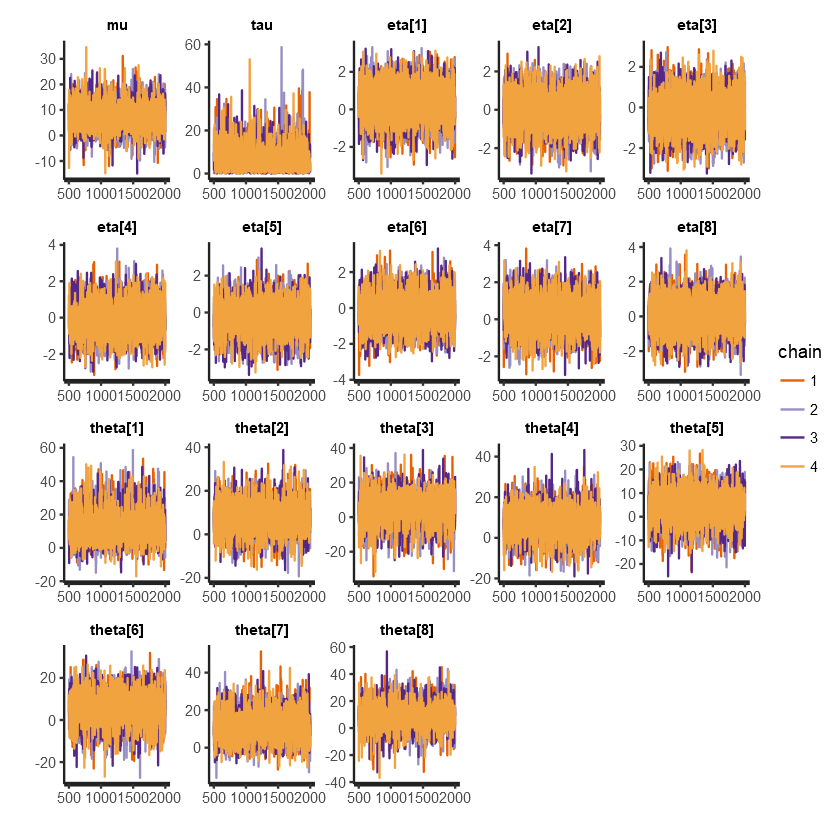

In [13]:
stan_trace(schools.stanFit, pars=c("mu","tau","eta","theta"))

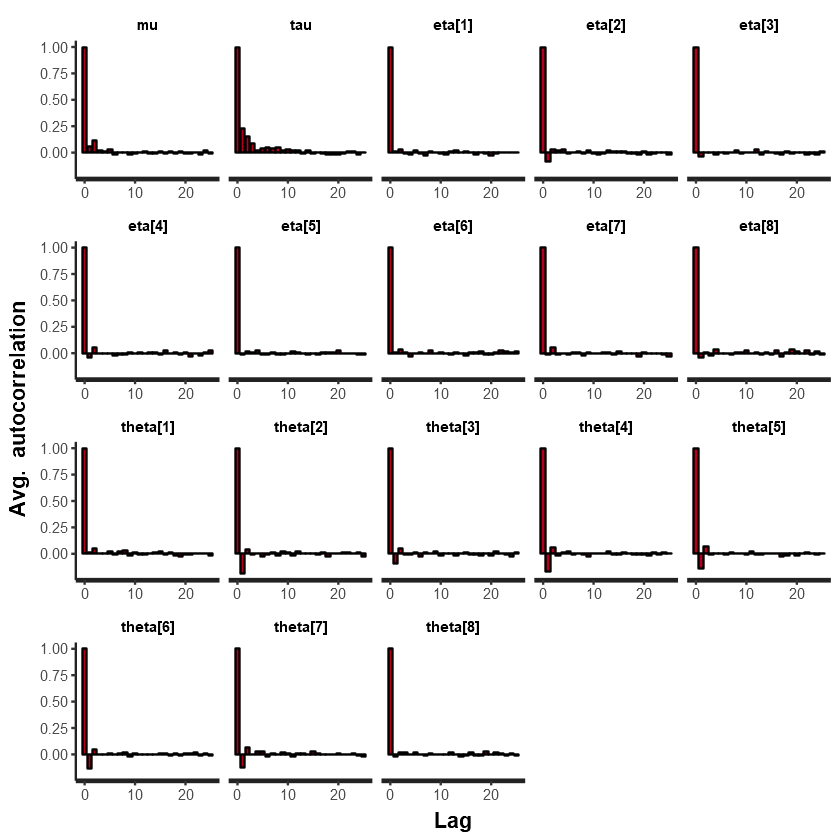

In [14]:
stan_ac(schools.stanFit, pars=c("mu","tau","eta","theta"))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


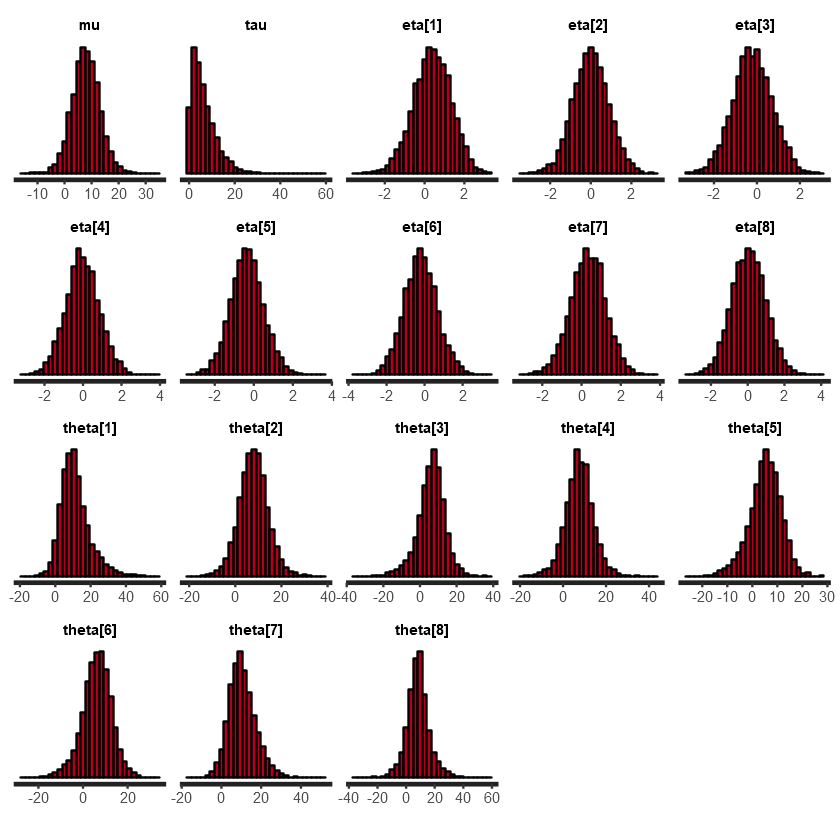

In [15]:
stan_hist(schools.stanFit, pars=c("mu","tau","eta","theta"))

ci_level: 0.8 (80% intervals)
outer_level: 0.95 (95% intervals)


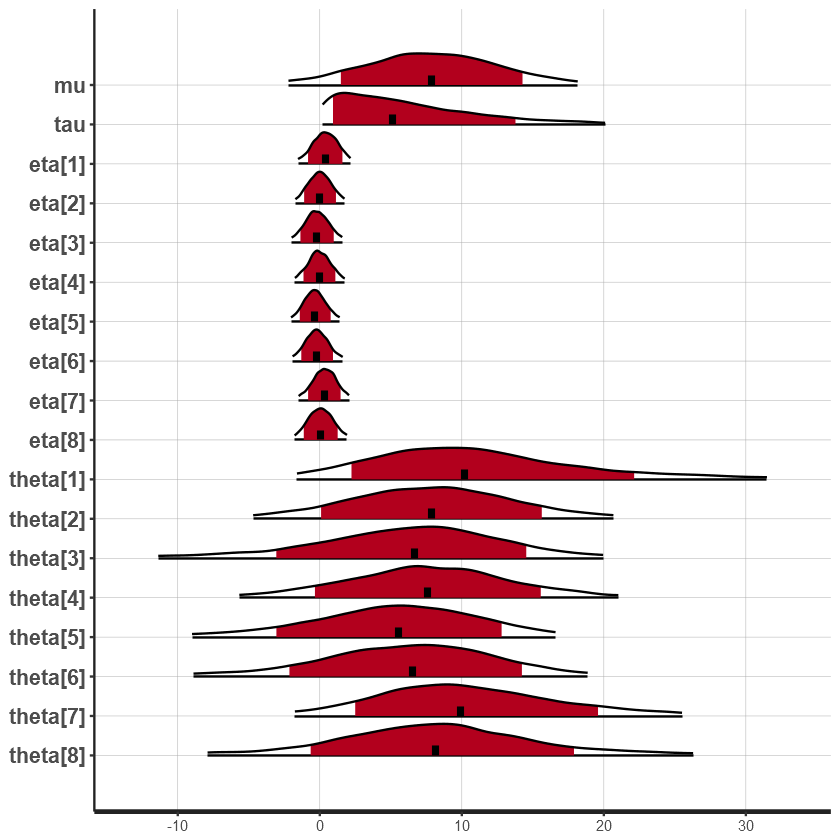

In [16]:
stan_plot(schools.stanFit, pars=c("mu","tau","eta","theta"),show_density = TRUE)